In [78]:
import numpy as np
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.3f}'.format)
import warnings
warnings.filterwarnings("ignore")
# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# Set global font properties using rcParams 让字体变大
plt.rcParams.update({
    'axes.labelsize': 13,          # Axis label font size
    'xtick.labelsize': 13,         # x-tick label font size
    'ytick.labelsize': 13,         # y-tick label font size
    'axes.titleweight': 'bold',    # Title weight (make the title bold)
    'axes.labelweight': 'bold',    # Axis label weight (make labels bold)
    'font.weight': 'bold'          # Global font weight for all text
})

# 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [80]:
df = pd.read_excel("../已清洗数据（空值异常值处理）/安庆1234号清洗2023.xlsx")
df.columns
# df["收到基含碳量"] = df["空干基含碳量"] * (100 - df["全水分"])/(100 - df["水分%"])

Index(['时间', '机主汽压力', '机再热汽温度', '发电厂用电率', '运行小时', '低缸排汽温度', '热力计算排烟温度', '氧量',
       '空预器漏风率', '真空', '炉给水温度', '平均负荷', '送风温度', '主汽温度', '平均负荷率', '空干基含碳量',
       '收到基挥发分', '收到基灰分', '收到基低位发热量', '全水分', '碳排放强度', '负荷率'],
      dtype='object')

In [81]:
# 选择特征
df = df[['机再热汽温度', '氧量', '热力计算排烟温度', '送风温度', '机主汽压力', '主汽温度', '低缸排汽温度', '炉给水温度',
       '全水分', '收到基灰分', '收到基挥发分', '空干基含碳量',
       '收到基低位发热量', '发电厂用电率', '平均负荷率', '碳排放强度']]
df

,机再热汽温度,氧量,热力计算排烟温度,送风温度,机主汽压力,主汽温度,低缸排汽温度,炉给水温度,全水分,收到基灰分,收到基挥发分,空干基含碳量,收到基低位发热量,发电厂用电率,平均负荷率,碳排放强度
0,512.900,4.390,119.690,7.870,12.300,540.040,26.850,245.990,14.200,23.390,24.330,54.080,18369.700,4.920,64.584,838.918
1,515.220,4.050,123.480,9.600,13.710,539.850,28.490,250.550,14.200,23.390,24.330,54.080,18369.700,4.630,72.006,863.165
2,504.590,5.130,122.510,11.260,11.870,542.230,24.800,235.060,14.200,23.390,24.330,54.080,18369.700,5.500,53.384,902.416
3,504.140,5.110,125.560,12.070,11.520,543.100,24.420,233.020,14.200,23.390,24.330,54.080,18369.700,5.560,51.562,896.849
4,505.970,5.310,127.300,13.160,11.390,541.950,24.590,232.480,14.200,23.390,24.330,54.080,18369.700,7.030,50.912,906.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,615.190,3.640,113.950,9.730,26.180,598.080,29.730,295.320,17.100,14.960,24.760,60.140,20186.400,3.120,86.646,371.593
779,614.450,3.050,115.830,8.970,27.960,598.390,30.430,298.260,17.100,14.960,24.760,60.140,20186.400,3.020,93.812,360.842
780,613.350,3.110,116.150,9.690,28.110,597.710,31.000,298.950,17.100,14.960,24.760,60.140,20186.400,3.040,94.750,365.821
781,614.340,3.450,115.040,11.200,25.560,598.610,31.050,294.510,17.100,14.960,24.760,60.140,20186.400,3.120,84.083,355.232


In [86]:
df.to_excel(r"C:\Users\RY\Desktop\清洗数据\安庆清洗.xlsx", index = False)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   机再热汽温度    783 non-null    float64
 1   氧量        783 non-null    float64
 2   热力计算排烟温度  783 non-null    float64
 3   送风温度      783 non-null    float64
 4   机主汽压力     783 non-null    float64
 5   主汽温度      783 non-null    float64
 6   低缸排汽温度    783 non-null    float64
 7   炉给水温度     783 non-null    float64
 8   全水分       783 non-null    float64
 9   收到基灰分     783 non-null    float64
 10  收到基挥发分    783 non-null    float64
 11  空干基含碳量    783 non-null    float64
 12  收到基低位发热量  783 non-null    float64
 13  发电厂用电率    783 non-null    float64
 14  平均负荷率     783 non-null    float64
 15  碳排放强度     783 non-null    float64
dtypes: float64(16)
memory usage: 98.0 KB


In [67]:
df.columns

Index(['机再热汽温度', '氧量', '热力计算排烟温度', '送风温度', '机主汽压力', '主汽温度', '低缸排汽温度', '炉给水温度',
       '全水分', '收到基灰分', '收到基挥发分', '空干基含碳量', '收到基低位发热量', '发电厂用电率', '平均负荷率',
       '碳排放强度'],
      dtype='object')

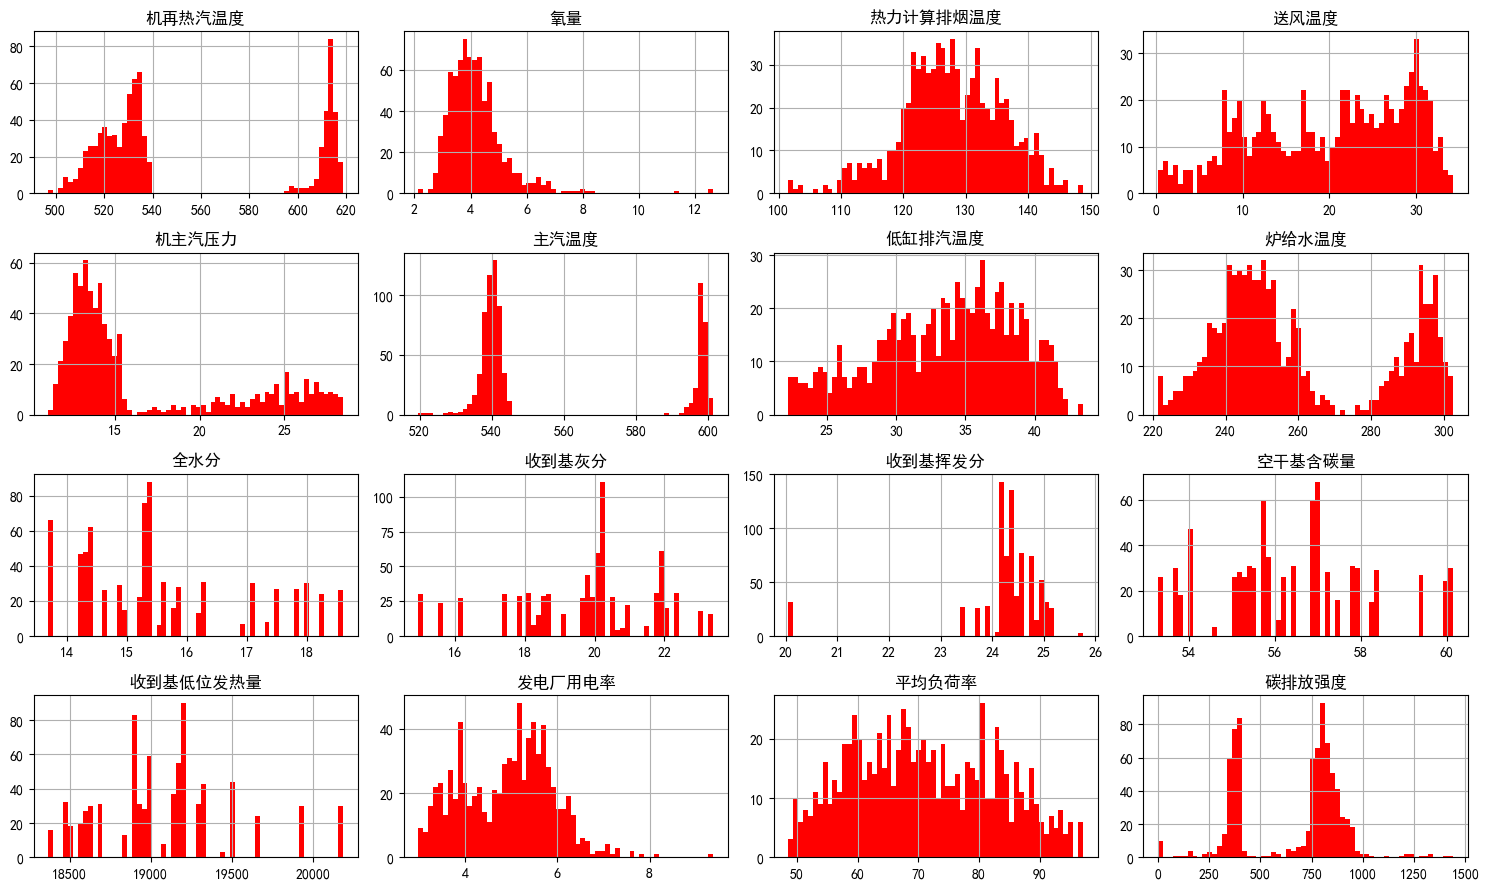

In [50]:
df.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

## 特征工程

In [68]:
correlation_matrix = df.iloc[:, 1:].corr()#除日期列

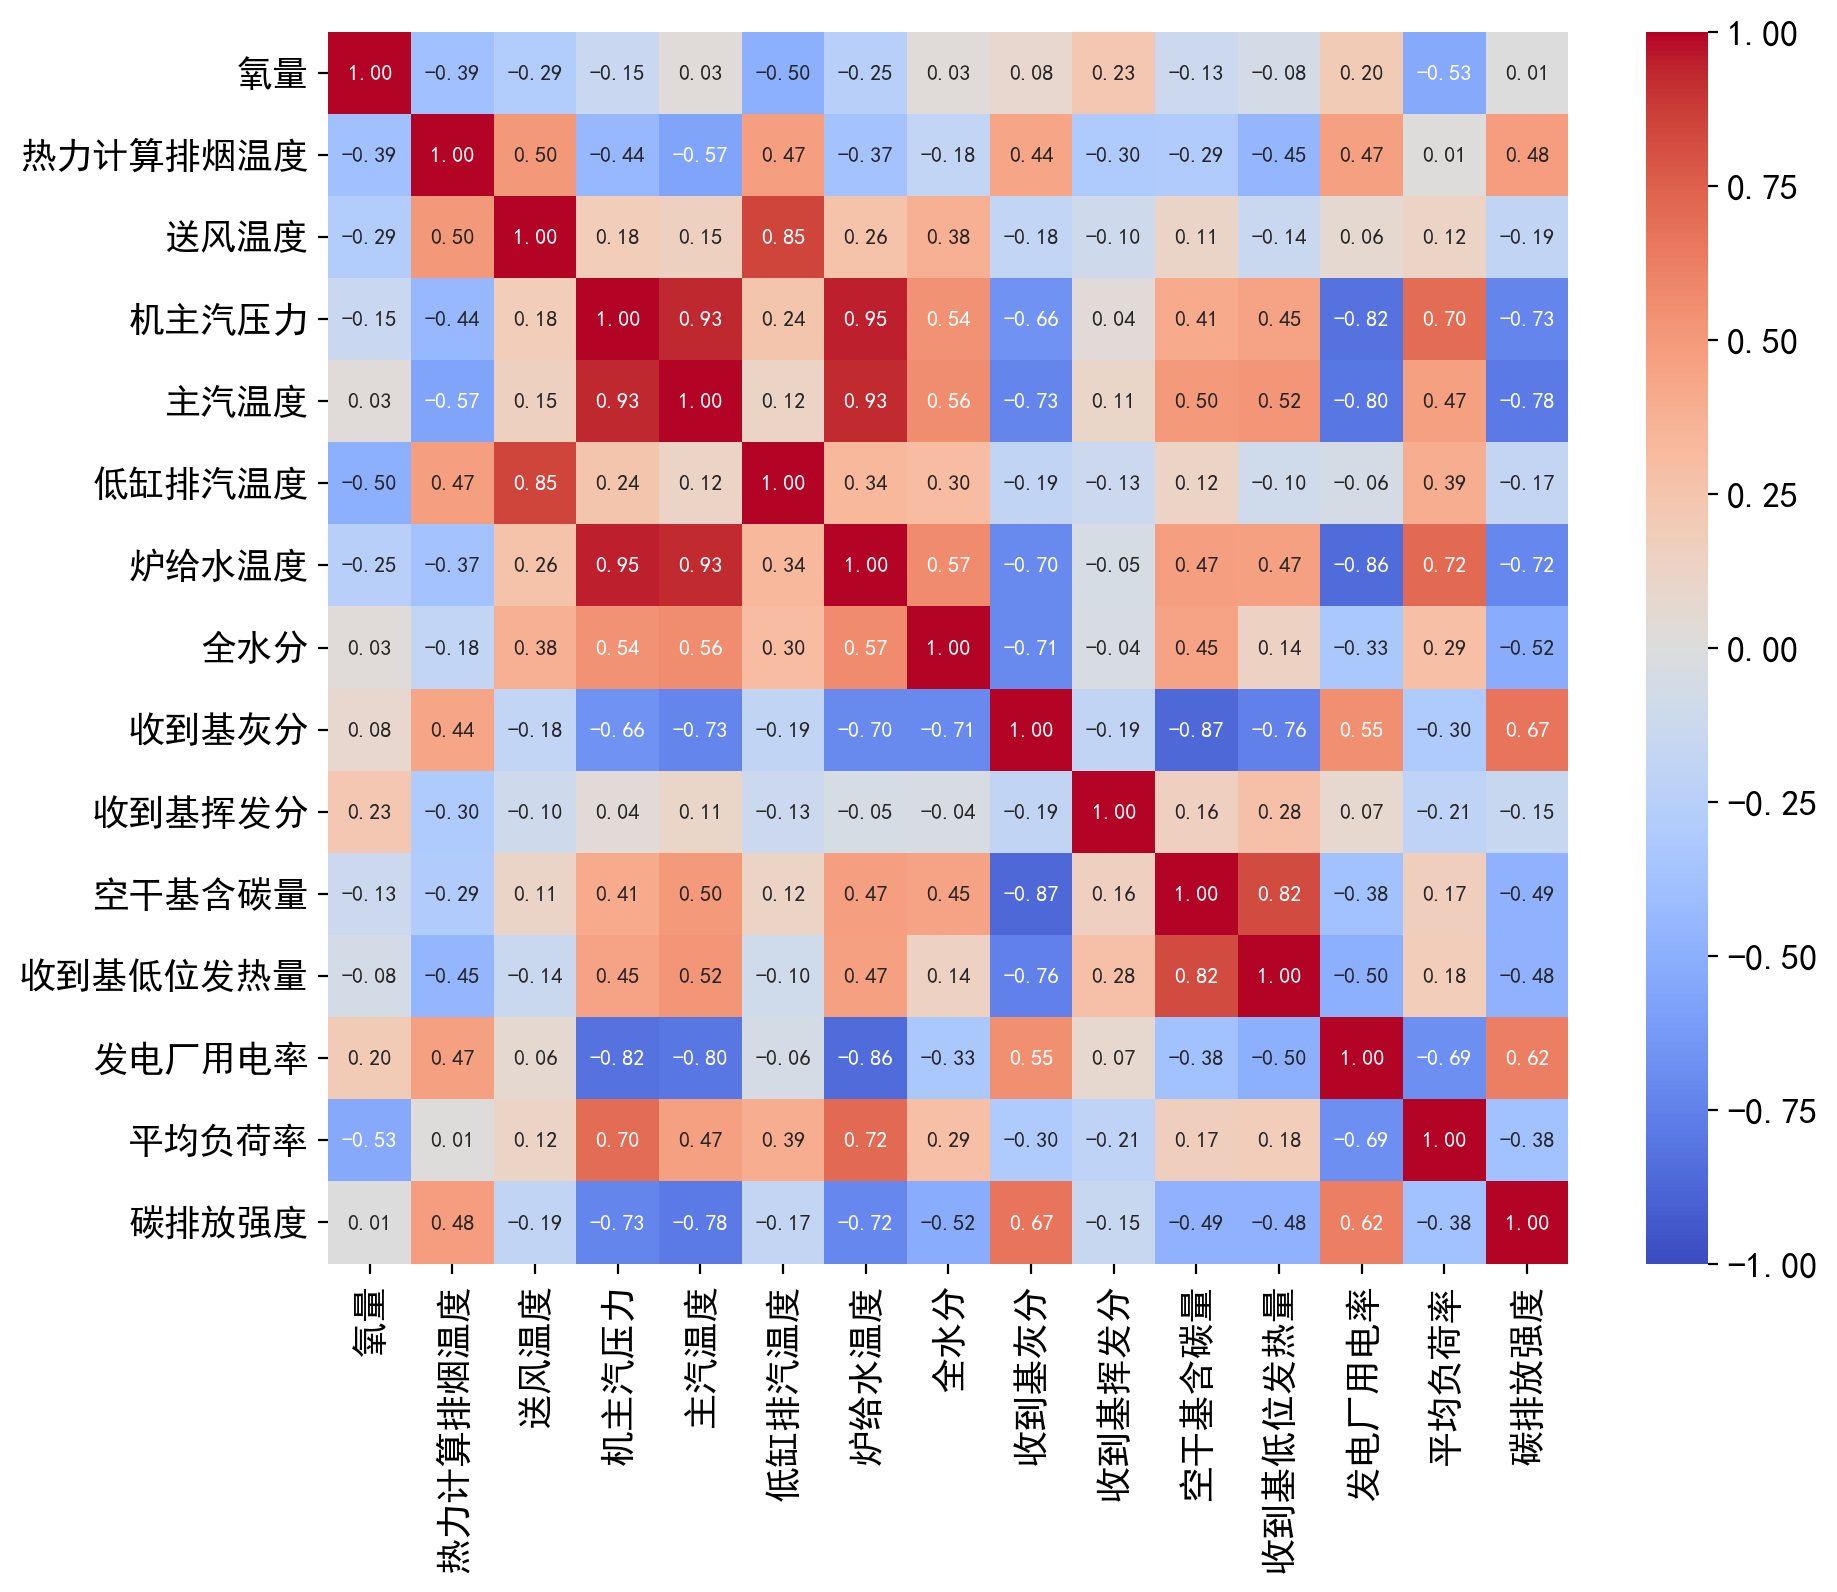

In [69]:

# 函数绘制相关性热力图
def show_heatmap(correlation_matrix):
    # Set the size of the heatmap
    plt.figure(figsize=(10, 8))
    plt.rcParams.update({'font.size': 8})
    # Draw the heatmap
    sns_plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)  
    # Set the title and labels
    # Show the plot
    plt.show()
    # sns_plot.figure.savefig("图2_热力图.png",dpi=1000,bbox_inches='tight')
show_heatmap(correlation_matrix)   

## 划分训练集和测试集

In [70]:
# 数据集中包含特征和目标变量，要把他们划分开
# 特征矩阵，不包含目标变量。df中去除碳排放强度列以外的列就是特征。
X1 = df.drop('碳排放强度', axis=1)
# df的碳排放强度列是目标变量
y1 = df['碳排放强度']
from sklearn.model_selection import train_test_split
#划分训练集和测试集，将数据集分为训练集（80%）和测试集（20%）
# test_size=0.2 这个参数就代表20%的样本做测试集
# random_state参数设置随机数种子，保证每次切分运行结果一致。
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

## 线性回归

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
# 创建线性回归模型
linear_model = LinearRegression()
# 拟合模型
linear_model.fit(X1_train, y1_train)
# 在测试集上进行预测
linear_y1_pred = linear_model.predict(X1_test)

linear_mse = mean_squared_error(y1_test, linear_y1_pred)
linear_rmse = np.sqrt(linear_mse)  # Calculating RMSE
linear_mae = mean_absolute_error(y1_test, linear_y1_pred)
linear_mape = mean_absolute_percentage_error(y1_test, linear_y1_pred)
linear_r2 = r2_score(y1_test,linear_y1_pred)

# 输出结果
print(f"linear_MSE: {linear_mse:.6f}")
print(f"linear_RMSE: {linear_rmse:.6f}")
print(f"linear_MAE: {linear_mae:.6f}")
print(f"linear_MAPE: {linear_mape*100:.6f}")
print(f"linear_R Square: {linear_r2:.6f}")
print(f"回归系数: {linear_model.coef_}")
print(f"截距: {linear_model.intercept_}")

linear_MSE: 22167.939172
linear_RMSE: 148.889016
linear_MAE: 91.293938
linear_MAPE: 258.226057
linear_R Square: 0.648371
回归系数: [ -3.95701874  23.02374786   8.26807112  -9.07659862  25.19558554
  -8.62223863   1.07182349  10.35185422 -29.11274536  -8.2549082
   0.19925488  -1.76049594  -0.09868989  15.72601364  -9.8033689 ]
截距: 6748.809693321737


## 3.1 随机森林（Random Forest，RF）

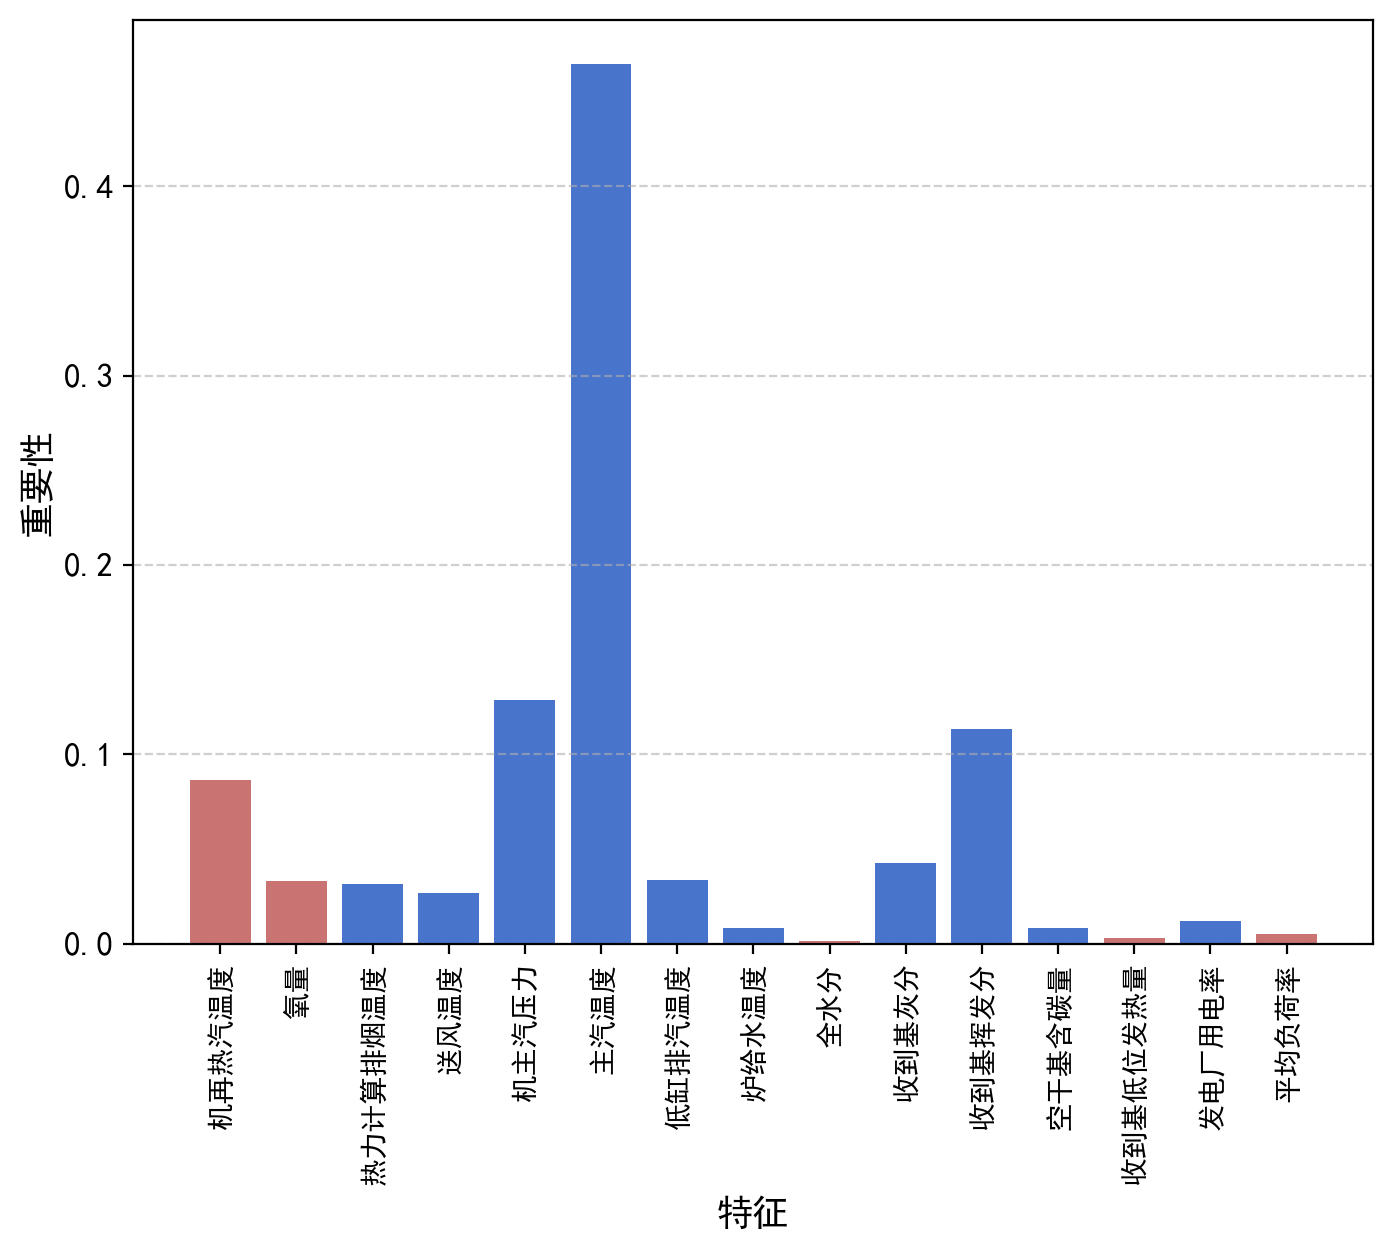

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
rf_model = RandomForestRegressor(n_jobs=28)
# rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X1_train, y1_train)
rf_y1_pred = rf_model.predict(X1_test)

rf_mse = mean_squared_error(y1_test, rf_y1_pred)
rf_rmse = np.sqrt(rf_mse)  # Calculating RMSE
rf_mae = mean_absolute_error(y1_test, rf_y1_pred)
rf_mape = mean_absolute_percentage_error(y1_test, rf_y1_pred)
rf_r2 = r2_score(y1_test, rf_y1_pred)

feature_importances = rf_model.feature_importances_
feature_names = X1.columns
# 计算特征与目标变量的相关系数
correlations =correlation_matrix['碳排放强度'].drop('碳排放强度')
# 可视化特征重要性和相关性
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances, color=np.where(correlations > 0, '#CA7373', '#4874CB'))
plt.xticks(fontsize=10, rotation=90,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel("特征",fontsize = 13,fontweight='bold')
plt.ylabel("重要性",fontsize = 13,fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.savefig("rf1_corr.png",dpi=500,bbox_inches='tight')

In [73]:
print(f"rf_MSE: {rf_mse:.6f}")
print(f"rf_RMSE: {rf_rmse:.6f}")
print(f"rf_MAE: {rf_mae:.6f}")
print(f"rf_MAPE: {rf_mape*100:.6f}")
print(f"rf_R Square: {rf_r2:.6f}")

rf_MSE: 9066.547794
rf_RMSE: 95.218422
rf_MAE: 48.363627
rf_MAPE: 159.140994
rf_R Square: 0.856186


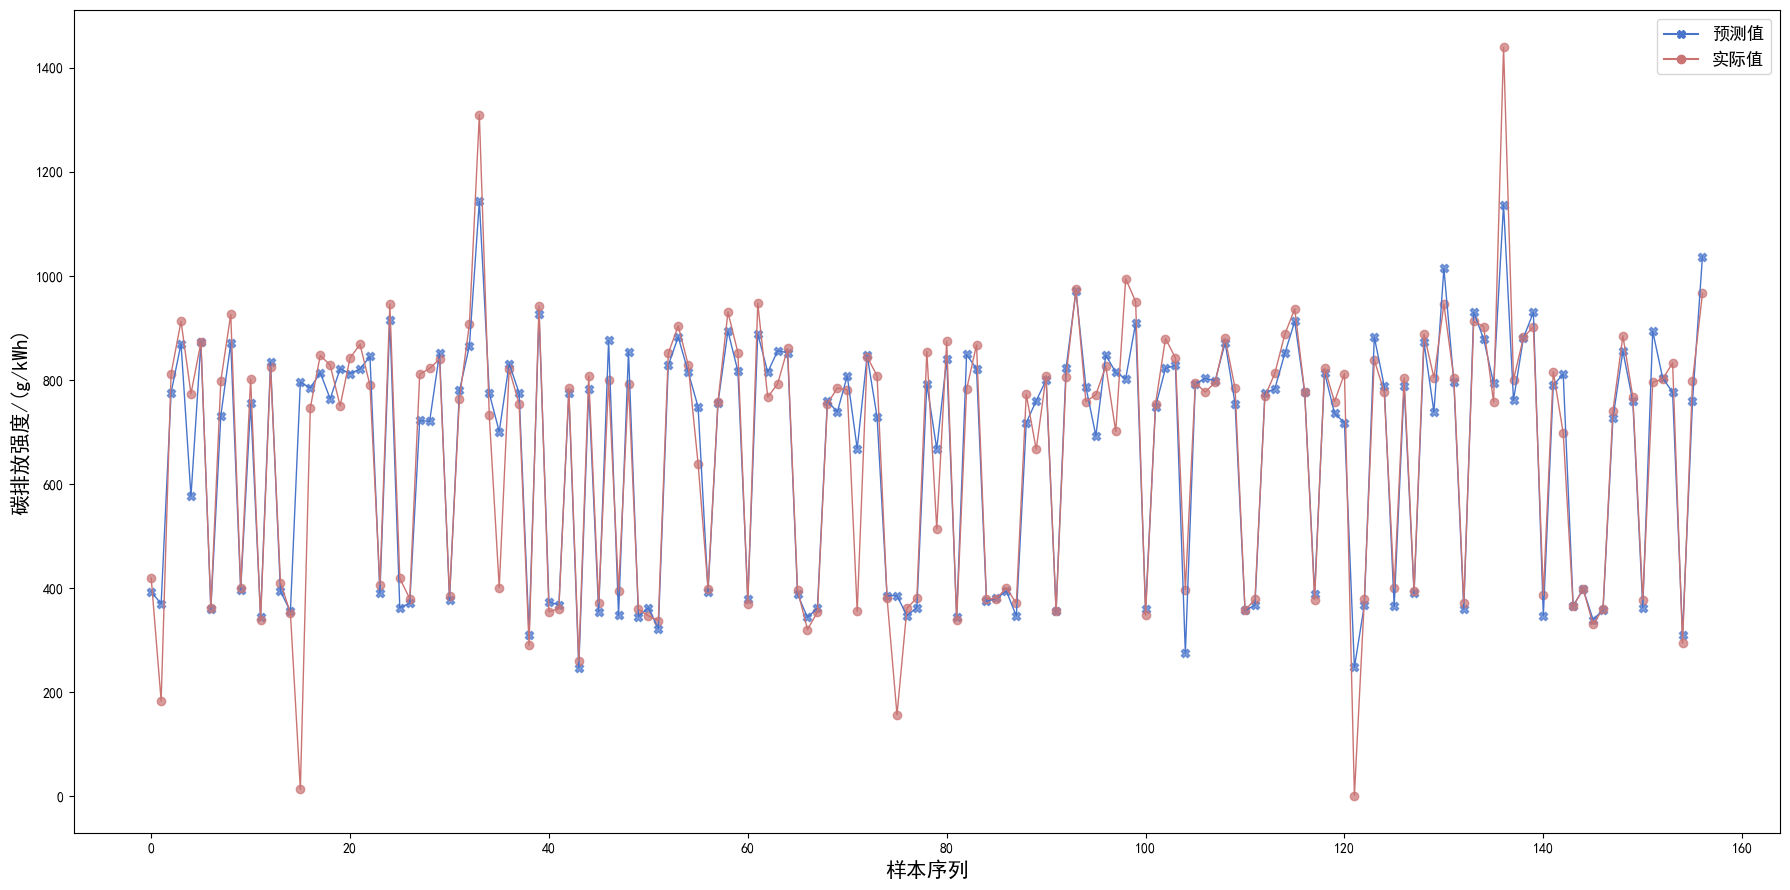

In [56]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines  # 导入 mlines
# 绘制test data预测值和真实值
plt.figure(figsize=(18, 9))
plt.plot(rf_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(rf_y1_pred)), rf_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("rf1.png",dpi=500,bbox_inches='tight')
plt.show()

## 3.2 XGBoost

In [74]:
from xgboost import XGBRegressor
# 初始化XGBoost回归器
xgb_model = XGBRegressor(
    n_estimators=300,        # 树的数量
    max_depth=3,             # 树的最大深度
    learning_rate=0.1,       # 学习率
    subsample=0.8,           # 每棵树使用的样本比例
    colsample_bytree=0.8,    # 每棵树使用的特征比例
    # random_state=42
)
# 训练模型
xgb_model.fit(X1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

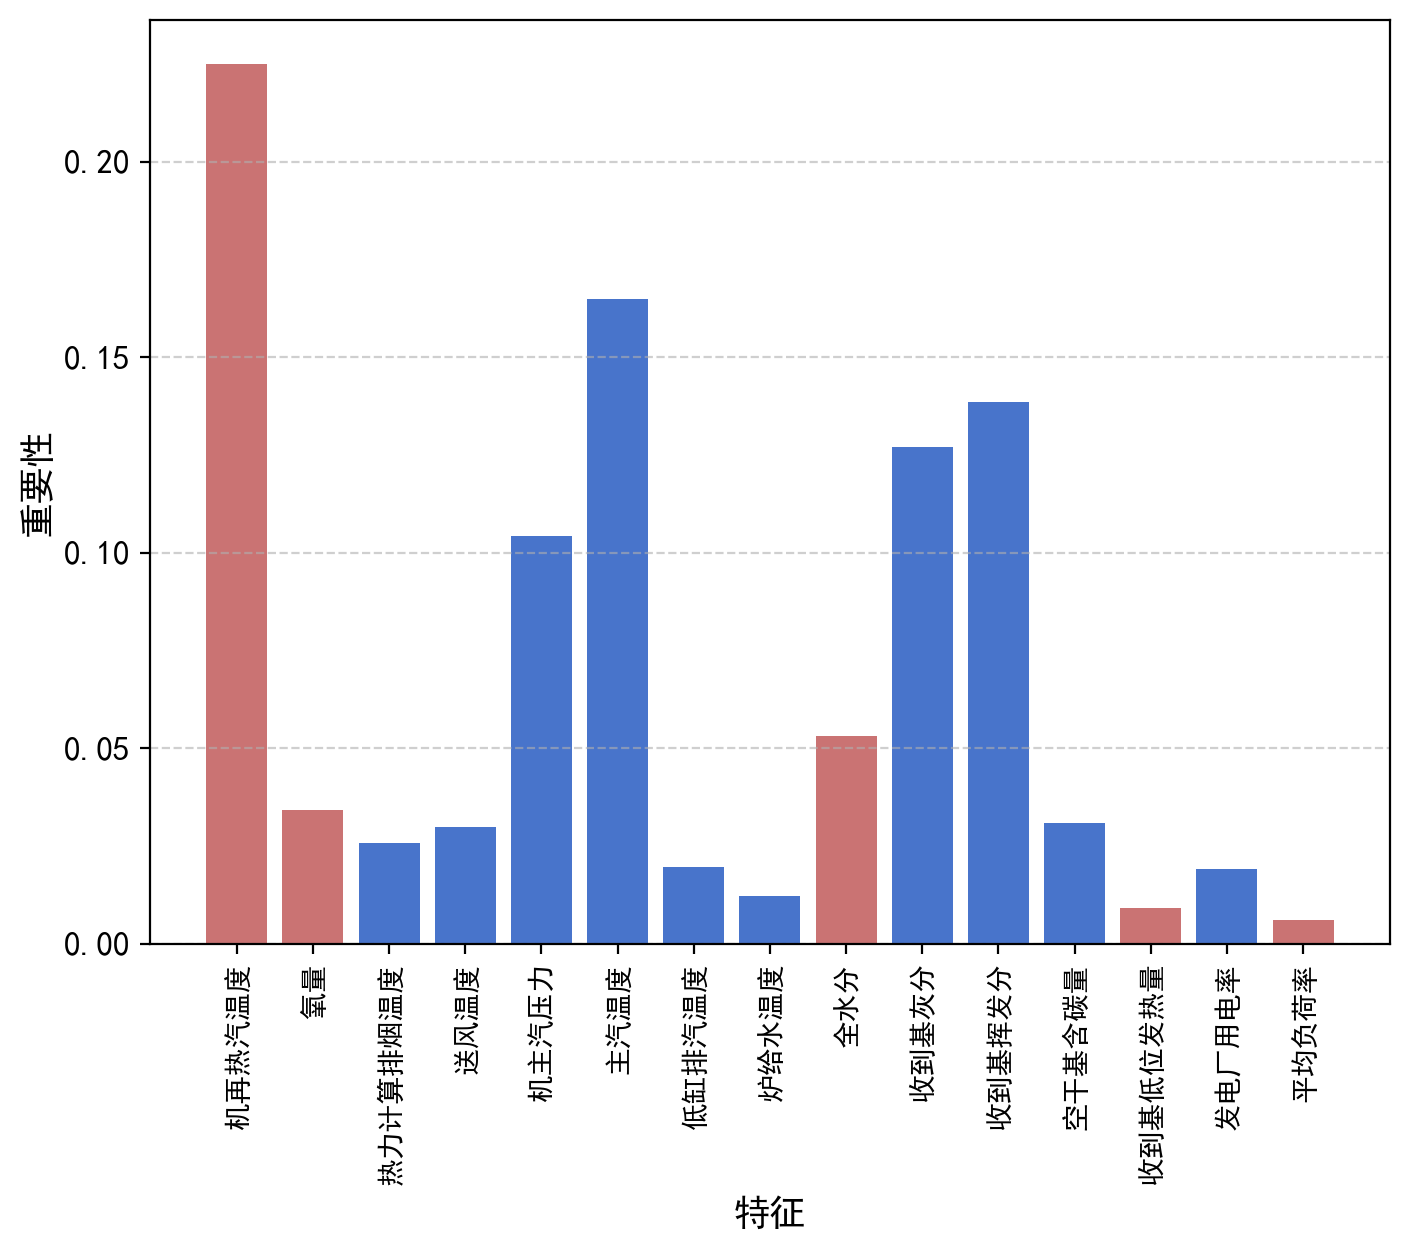

In [75]:
from matplotlib.font_manager import FontProperties
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
# Predict on the test set
xgb_y1_pred =  xgb_model.predict(X1_test)
# Evaluate the model
xgb_mse = mean_squared_error(y1_test, xgb_y1_pred)
xgb_rmse = np.sqrt(xgb_mse)  # Calculating RMSE
xgb_mae = mean_absolute_error(y1_test, xgb_y1_pred)
xgb_mape = mean_absolute_percentage_error(y1_test, xgb_y1_pred)
xgb_r2 = r2_score(y1_test, xgb_y1_pred)
# 特征重要性
feature_importances = xgb_model.feature_importances_
# 可视化特征重要性和相关性
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances, color=np.where(correlations > 0, '#CA7373', '#4874CB'))
plt.xticks(fontsize=10, rotation=90,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel("特征",fontsize = 13)
plt.ylabel("重要性",fontsize = 13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.savefig("xgb1_corr.png",dpi=500,bbox_inches='tight')

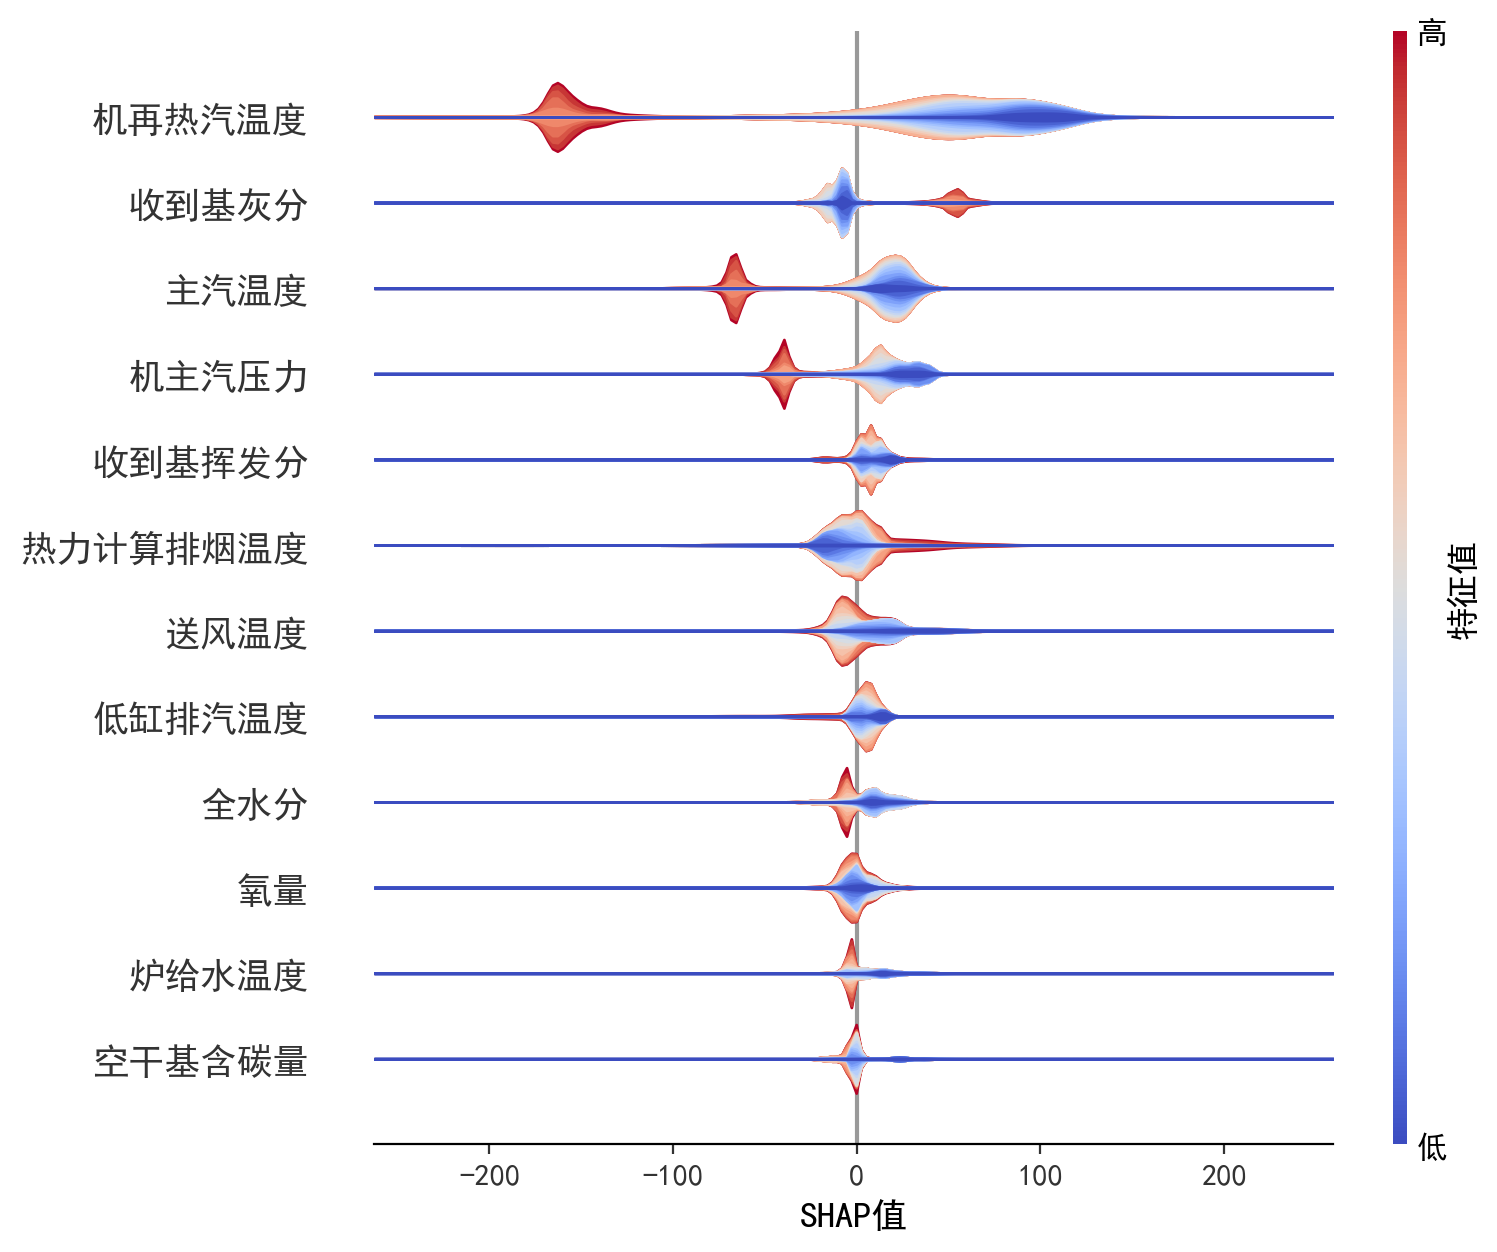

In [82]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Create a custom colormap with two colors
colors = ['#CA7373', '#4874CB']  # Low -> high color scale
ncmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Visualize SHAP violin plot with custom colormap
shap.summary_plot(shap_values, X1_test, plot_type="layered_violin", show=False, cmap=ncmap, max_display=12,)


fig = plt.gcf()
ax = fig.axes[-1]
ax.set_ylabel('特征值')
# ax.yaxis.label
ax.set_yticklabels(['低', '高'])

# 获取当前的坐标轴对象
ax = plt.gca()  # 获取当前的坐标轴对象
# 设置 x 轴标签（SHAP值）
ax.set_xlabel('SHAP值')  # 修改 x 轴的标签


# Save the plot as a PNG with high resolution
# plt.savefig('shap1_violin_custom_colors.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()


In [59]:
print(f"xgb_MSE: {xgb_mse:.6f}")
print(f"xgb_RMSE: {xgb_rmse:.6f}")
print(f"xgb_MAE: {xgb_mae:.6f}")
print(f"xgb_MAPE: {xgb_mape*100:.6f}")
print(f"xgb_R Square: {xgb_r2:.6f}")

xgb_MSE: 9195.930755
xgb_RMSE: 95.895416
xgb_MAE: 48.388176
xgb_MAPE: 48.833822
xgb_R Square: 0.854134


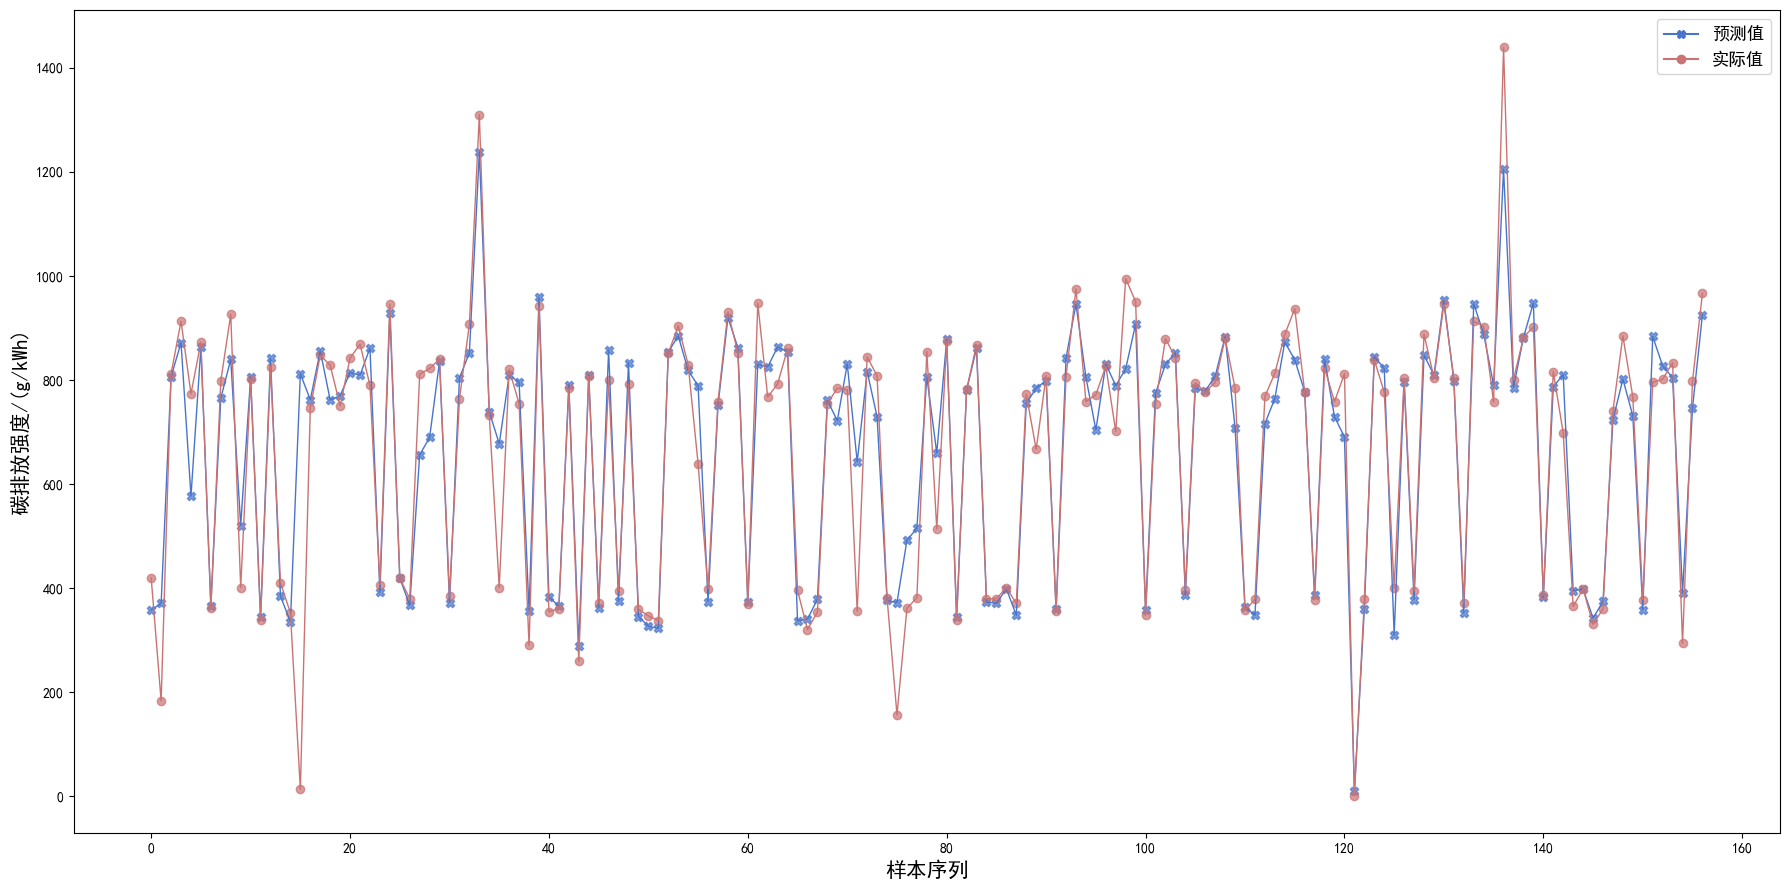

In [15]:
#xgb 机组1 测试集
# 绘制test data预测值和真实值
plt.figure(figsize=(18, 9))
plt.plot(xgb_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(xgb_y1_pred)), xgb_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("xgb1.png",dpi=500,bbox_inches='tight')
plt.show()


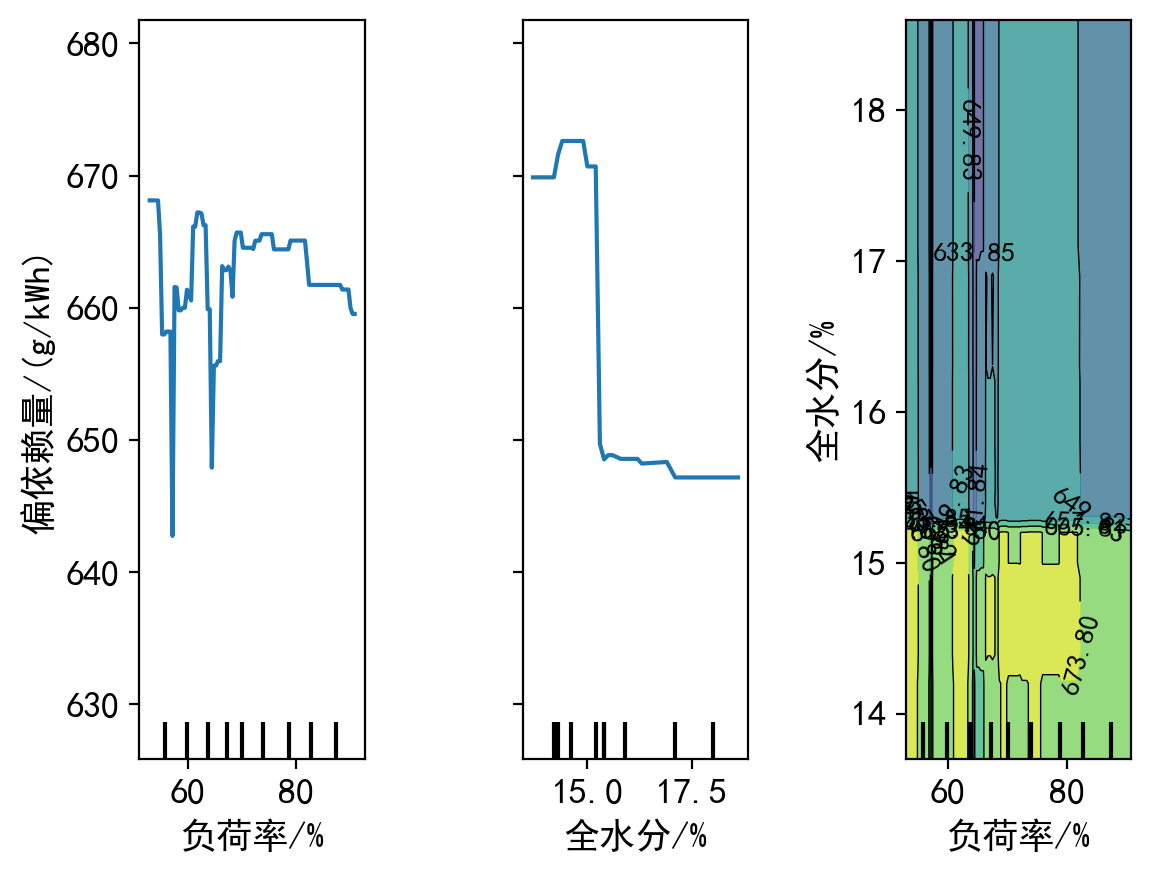

In [87]:
from sklearn.inspection import PartialDependenceDisplay

t2_features1 = ['平均负荷率', '全水分',('平均负荷率','全水分' )]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(xgb_model, df.drop(columns=['碳排放强度']), t2_features1)

# Modify the y-axis label from "PartialDependence" to "偏依赖量"
# Modify the y-axis label from "PartialDependence" to "偏依赖量"
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_ylabel('全水分/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[0].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[1].set_xlabel('全水分/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
plt.subplots_adjust(wspace=0.7) 

# Save the plot to an image file
#plt.savefig('partial_dependence_plot1.png', dpi=1000, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

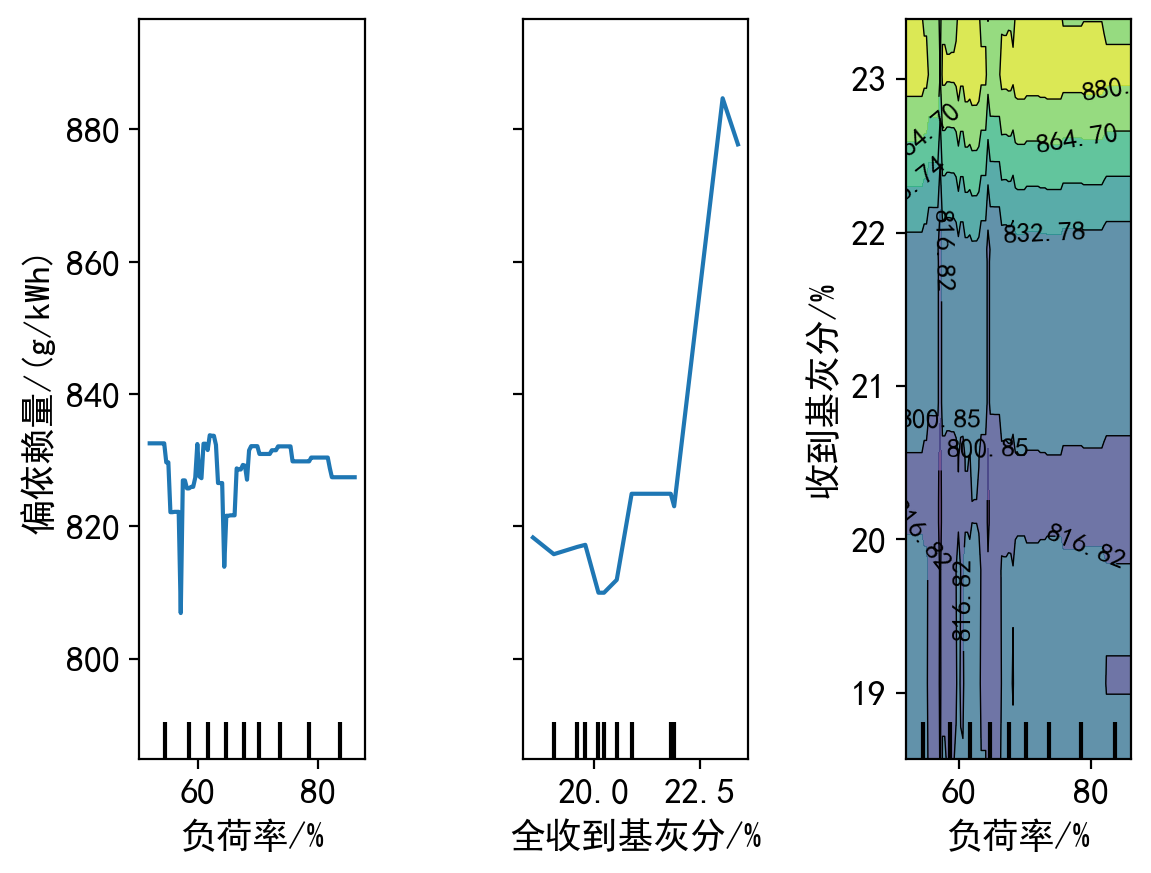

In [90]:
t2_features2 = ['平均负荷率', '收到基灰分',('平均负荷率','收到基灰分' )]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(xgb_model, df[0:300].drop(columns=['碳排放强度']), t2_features2)

# Modify the y-axis label from "PartialDependence" to "偏依赖量"
# Modify the y-axis label from "PartialDependence" to "偏依赖量"
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_ylabel('收到基灰分/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[0].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[1].set_xlabel('全收到基灰分/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
plt.subplots_adjust(wspace=0.7) 

# Save the plot to an image file
#plt.savefig('partial_dependence_plot2.png', dpi=1000, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

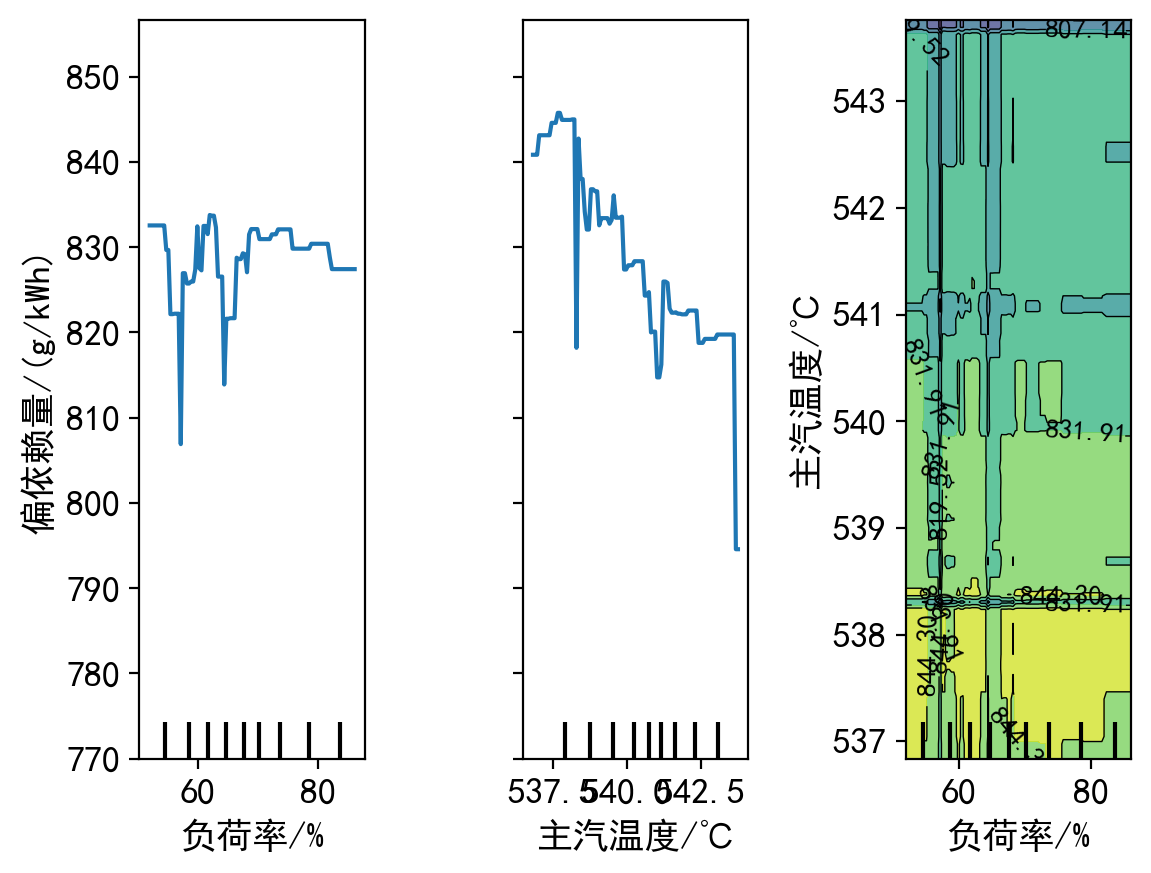

In [91]:
t2_features3 = ['平均负荷率', '主汽温度',('平均负荷率','主汽温度' )]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(xgb_model, df[0:300].drop(columns=['碳排放强度']), t2_features3)

# Modify the y-axis label from "PartialDependence" to "偏依赖量"
# Modify the y-axis label from "PartialDependence" to "偏依赖量"
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_ylabel('主汽温度/℃', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[0].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[1].set_xlabel('主汽温度/℃', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
plt.subplots_adjust(wspace=0.7) 

# Save the plot to an image file
#plt.savefig('partial_dependence_plot3.png', dpi=1000, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


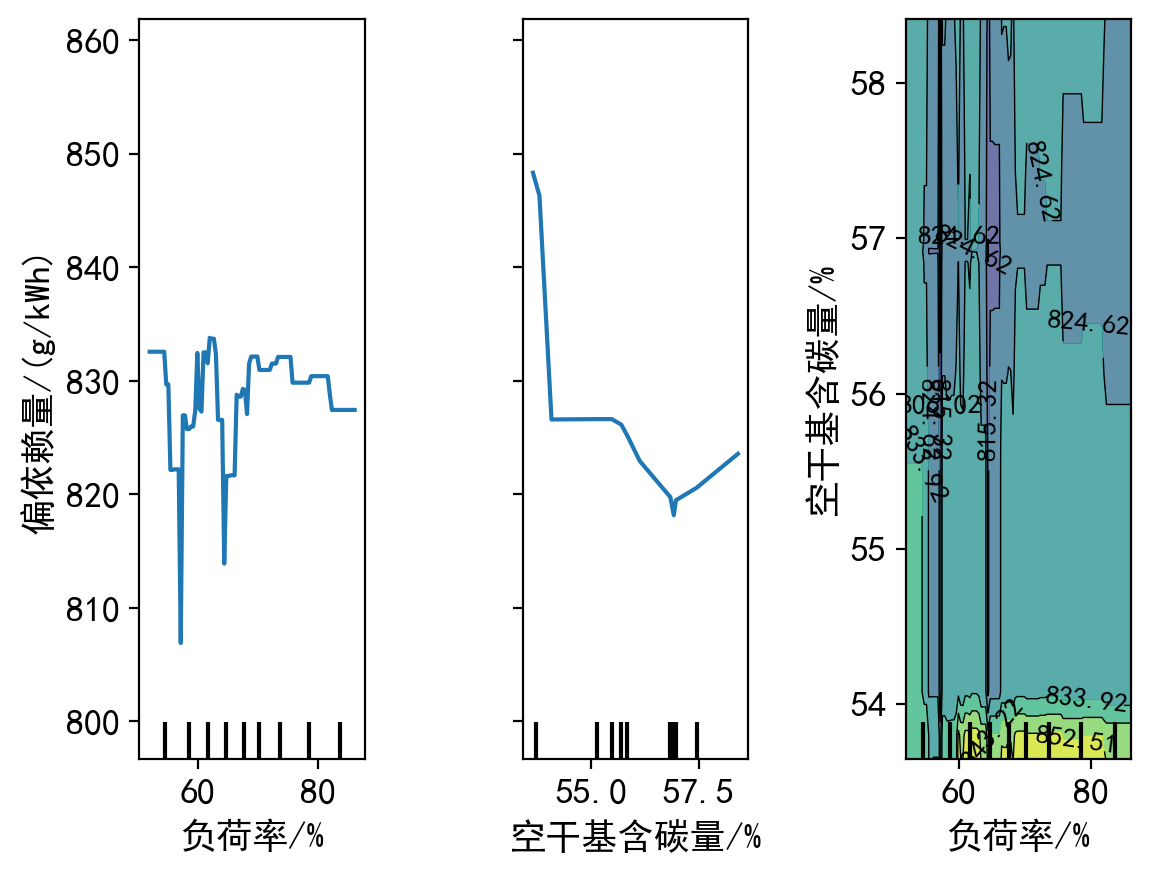

In [92]:
t2_features4 = ['平均负荷率', '空干基含碳量',('平均负荷率','空干基含碳量' )]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(xgb_model, df[0:300].drop(columns=['碳排放强度']), t2_features4)

# Modify the y-axis label from "PartialDependence" to "偏依赖量"
# Modify the y-axis label from "PartialDependence" to "偏依赖量"
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_ylabel('空干基含碳量/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[0].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[1].set_xlabel('空干基含碳量/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_xlabel('负荷率/%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
plt.subplots_adjust(wspace=0.7) 

# Save the plot to an image file
#plt.savefig('partial_dependence_plot4.png', dpi=1000, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


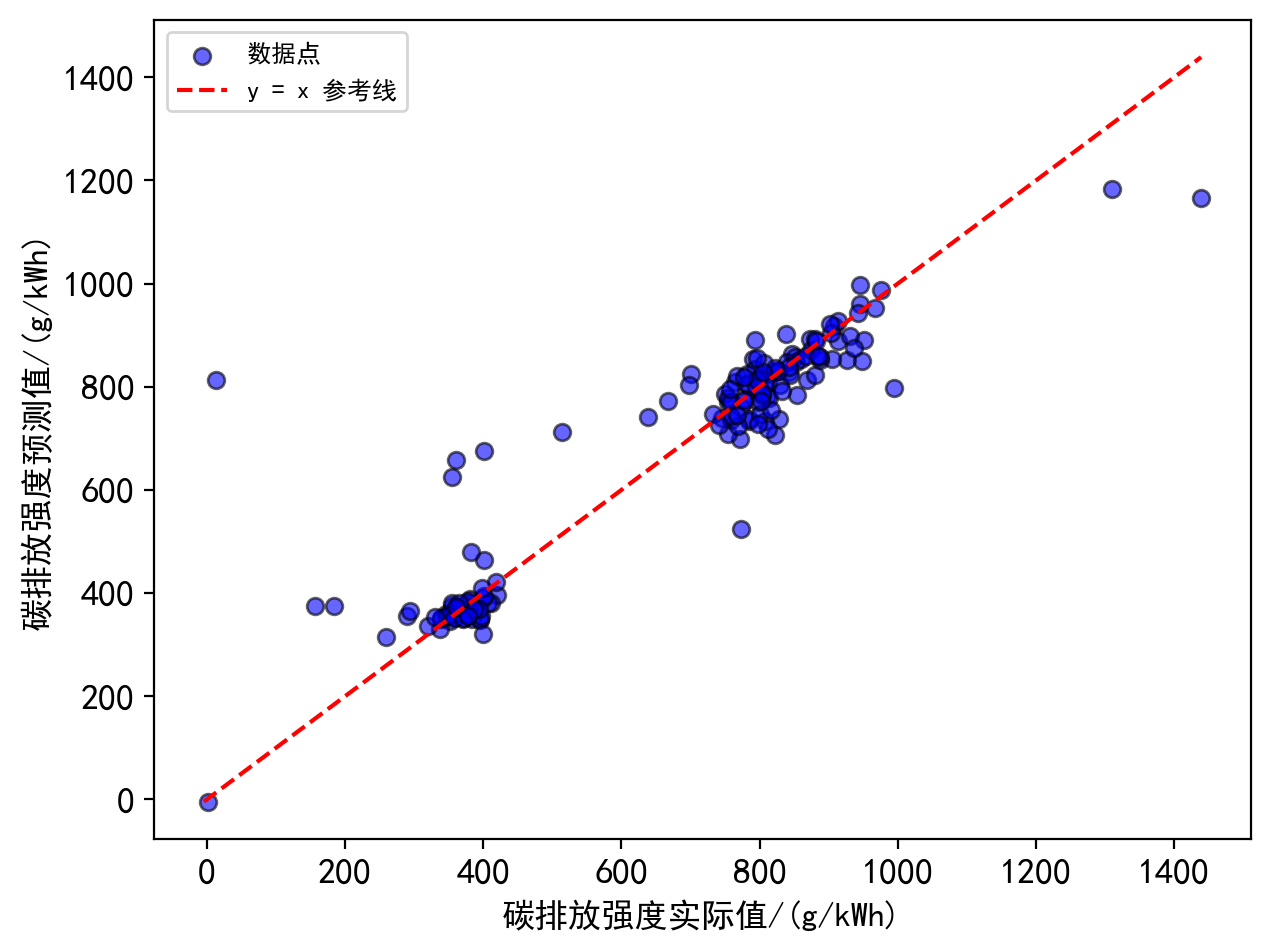

In [88]:
# Evaluate the model
xgb_mse = mean_squared_error(y1_test, xgb_y1_pred)
xgb_rmse = np.sqrt(xgb_mse)  # Calculating RMSE
xgb_mae = mean_absolute_error(y1_test, xgb_y1_pred)
xgb_mape = mean_absolute_percentage_error(y1_test, xgb_y1_pred)
xgb_r2 = r2_score(y1_test, xgb_y1_pred)

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
#plt.savefig('预测值与实际值的吻合度.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


## 关系图

In [89]:
X1_test.columns

Index(['机再热汽温度', '氧量', '热力计算排烟温度', '送风温度', '机主汽压力', '主汽温度', '低缸排汽温度', '炉给水温度',
       '全水分', '收到基灰分', '收到基挥发分', '空干基含碳量', '收到基低位发热量', '发电厂用电率', '平均负荷率'],
      dtype='object')

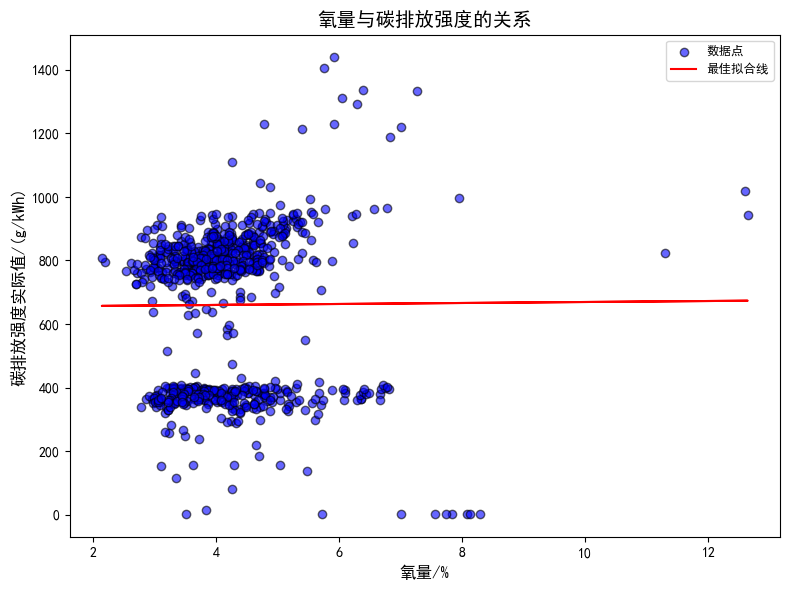

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 假设 X1 和 y1 是包含氧量和碳排放强度的列

# 创建一个单独的图
plt.figure(figsize=(8, 6))

# 绘制氧量与碳排放强度的散点图
plt.scatter(X1['氧量'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 计算最佳拟合线
slope, intercept, _, _, _ = linregress(X1['氧量'], y1)

# 绘制最佳拟合线
plt.plot(X1['氧量'], slope * X1['氧量'] + intercept, color='red', label='最佳拟合线')

# 设置标签和标题
plt.xlabel("氧量/%", fontsize=12)
plt.ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.title("氧量与碳排放强度的关系", fontsize=14)
plt.legend(fontsize=9)

# 设置坐标轴刻度
plt.tick_params(axis='both', which='major', labelsize=10)

# 显示图表
plt.tight_layout()

# 保存图像
# plt.savefig('氧量与碳排放强度关系.png', dpi=1200, bbox_inches='tight')  # 保存为PNG图像
plt.show()


In [19]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import linregress

# # Create a 2x2 grid of subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# # Plot 1: 全水分（%） vs 碳排放强度
# axs[0, 0].scatter(X1_test[' 全水分（%）'], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# # Calculate best fit line
# slope, intercept, _, _, _ = linregress(X1_test[' 全水分（%）'], y1_test)
# axs[0, 0].plot(X1_test[' 全水分（%）'], slope * X1_test[' 全水分（%）'] + intercept, color='red', label='最佳拟合线')
# axs[0, 0].set_xlabel(' 全水分（%）', fontsize=12)
# axs[0, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
# axs[0, 0].legend(fontsize=9)
# axs[0, 0].tick_params(axis='both', which='major', labelsize=10)

# # Plot 2: 送风温度 vs 碳排放强度
# axs[0, 1].scatter(X1_test["排汽温度"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# # Calculate best fit line
# slope, intercept, _, _, _ = linregress(X1_test["排汽温度"], y1_test)
# axs[0, 1].plot(X1_test["排汽温度"], slope * X1_test["排汽温度"] + intercept, color='red', label='最佳拟合线')
# axs[0, 1].set_xlabel("排汽温度/℃", fontsize=12)
# axs[0, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
# axs[0, 1].legend(fontsize=9)
# axs[0, 1].tick_params(axis='both', which='major', labelsize=10)

# # Plot 3: 收到基低位发热量(kJ/kg) vs 碳排放强度
# axs[1, 0].scatter(X1_test['QnetarMJ(MJ/kg)收到基低位发热量'], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# # Calculate best fit line
# slope, intercept, _, _, _ = linregress(X1_test['QnetarMJ(MJ/kg)收到基低位发热量'], y1_test)
# axs[1, 0].plot(X1_test['QnetarMJ(MJ/kg)收到基低位发热量'], slope * X1_test['QnetarMJ(MJ/kg)收到基低位发热量'] + intercept, color='red', label='最佳拟合线')
# axs[1, 0].set_xlabel('收到基低位发热量(kJ/kg)', fontsize=12)
# axs[1, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
# axs[1, 0].legend(fontsize=9)
# axs[1, 0].tick_params(axis='both', which='major', labelsize=10)

# # Plot 4: 负荷 vs 碳排放强度
# axs[1, 1].scatter(X1_test["负荷率"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# # Calculate best fit line
# slope, intercept, _, _, _ = linregress(X1_test["负荷率"], y1_test)
# axs[1, 1].plot(X1_test["负荷率"], slope * X1_test["负荷率"] + intercept, color='red', label='最佳拟合线')
# axs[1, 1].set_xlabel("负荷率/%", fontsize=12)
# axs[1, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
# axs[1, 1].legend(fontsize=9)
# axs[1, 1].tick_params(axis='both', which='major', labelsize=10)

# # Adjust layout to make sure subplots fit well
# plt.tight_layout()

# # Show the combined plot
# plt.show()


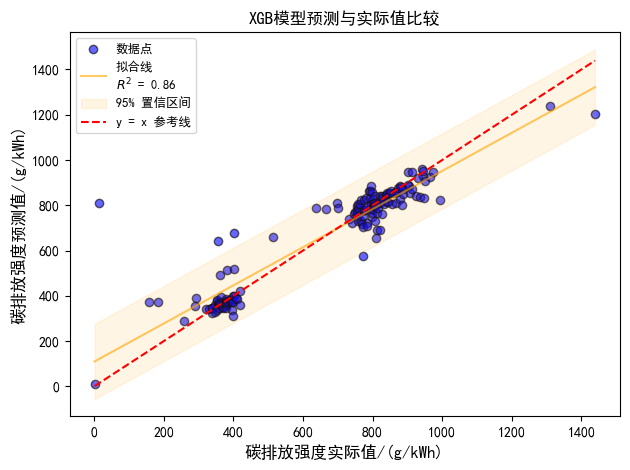

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，xgb_y1_pred 是 XGB 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y1_test, xgb_y1_pred, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y1_test)

# 计算残差
residuals = xgb_y1_pred - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y1_test, 'y_pred': xgb_y1_pred, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {r2_score(y1_test, xgb_y1_pred):.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.1, label='95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('安庆电厂预测值与实际值的吻合度_XGB.png', dpi=1000, bbox_inches='tight') 
# plt.show()


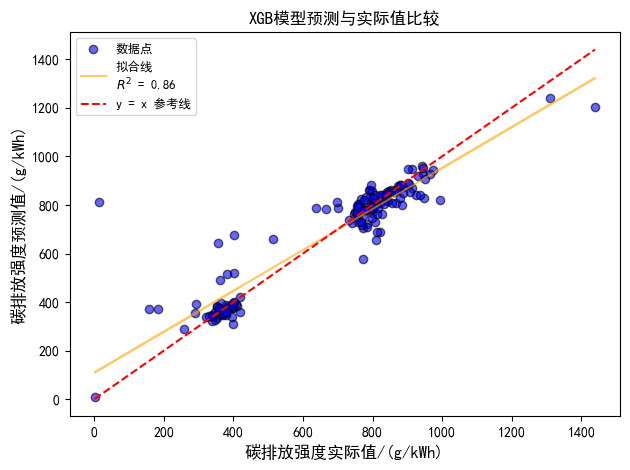

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 y1_test 是实际值，xgb_y1_pred 是XGB模型的预测值

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 使用numpy.polyfit拟合线，1表示线性拟合（一次多项式）
z = np.polyfit(y1_test, xgb_y1_pred, 1)
p = np.poly1d(z)

# 绘制拟合线
plt.plot(y1_test, p(y1_test), color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {np.corrcoef(y1_test, xgb_y1_pred)[0,1]**2:.2f}")

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
# plt.savefig('预测值与实际值的吻合度_with_fit_line.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


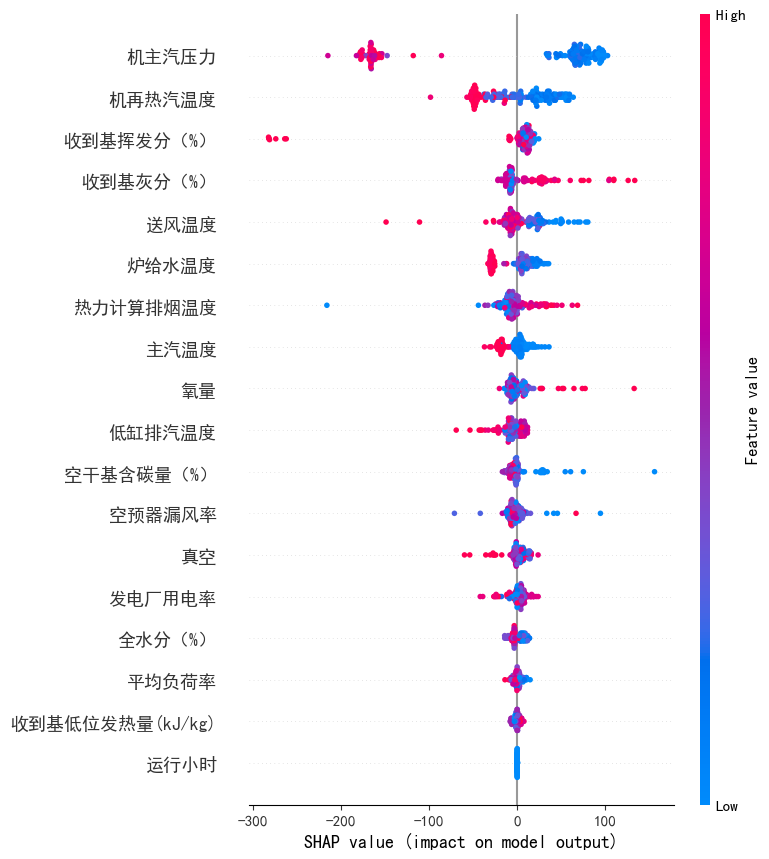

In [23]:
import shap
# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X1_test, show=False)
# plt.savefig('shap.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


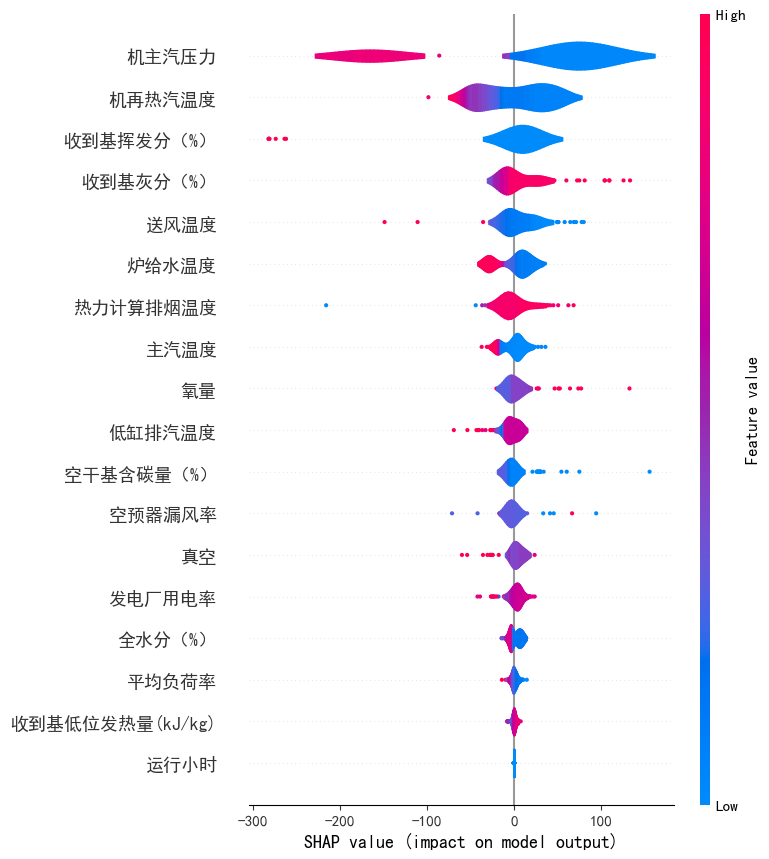

In [24]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Visualize SHAP violin plot
shap.summary_plot(shap_values, X1_test, plot_type="violin", show=False)

# Save the plot as a PNG with high resolution
# plt.savefig('shap_violin.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()
#'#CA7373', '#4874CB'

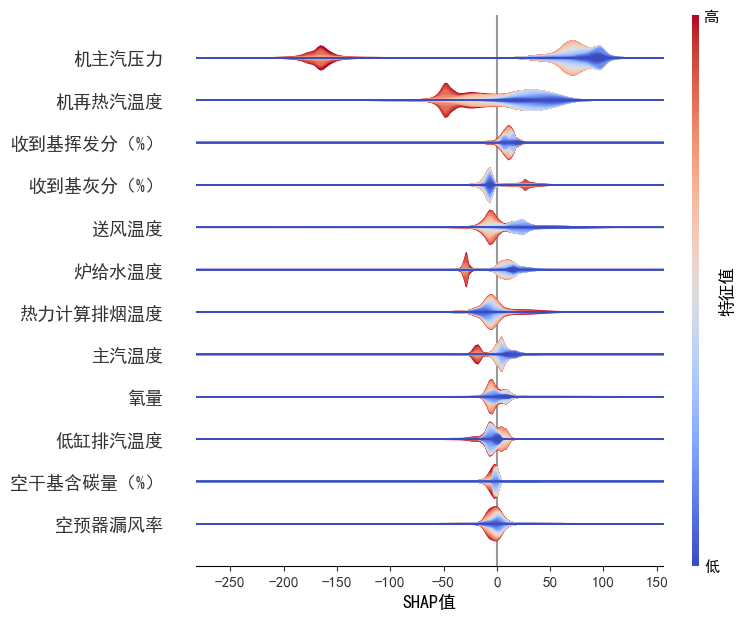

In [25]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Create a custom colormap with two colors
colors = ['#CA7373', '#4874CB']  # Low -> high color scale
ncmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Visualize SHAP violin plot with custom colormap
shap.summary_plot(shap_values, X1_test, plot_type="layered_violin", show=False, cmap=ncmap, max_display=12,)


fig = plt.gcf()
ax = fig.axes[-1]
ax.set_ylabel('特征值')
# ax.yaxis.label
ax.set_yticklabels(['低', '高'])

# 获取当前的坐标轴对象
ax = plt.gca()  # 获取当前的坐标轴对象
# 设置 x 轴标签（SHAP值）
ax.set_xlabel('SHAP值')  # 修改 x 轴的标签


# Save the plot as a PNG with high resolution
# plt.savefig('shap1_violin_custom_colors.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()


## 3.3 支持向量机

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 读取数据
data = df

# 预处理
data['时间'] = pd.to_datetime(data['时间'])

svm_X = data.drop(columns=['碳排放强度', '时间'])
svm_y = data['碳排放强度']

# 特征缩放
scaler = StandardScaler()
svm_X_scaled = scaler.fit_transform(svm_X)


# 划分训练集和测试集
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_X_scaled, svm_y, test_size=0.2, random_state=42)

# 创建并训练SVR模型
svr_model = SVR(kernel='linear')
svr_model.fit(svm_X_train, svm_y_train)

# 进行预测
svm_y_pred = svr_model.predict(svm_X_test)

# 评估模型
svm_mse = mean_squared_error(svm_y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(svm_y_test, svm_y_pred)
svm_mape = mean_absolute_percentage_error(svm_y_test, svm_y_pred)
svm_r2 = r2_score(svm_y_test, svm_y_pred)

print(f"svm_MSE: {svm_mse:.6f}")
print(f"svm_RMSE: {svm_rmse:.6f}")
print(f"svm_MAE: {svm_mae:.6f}")
print(f"svm_MAPE: {svm_mape*100:.6f}")
print(f"svm_R Square: {svm_r2:.6f}")

svm_MSE: 23691.821209
svm_RMSE: 153.921477
svm_MAE: 78.437293
svm_MAPE: 260.288047
svm_R Square: 0.624199


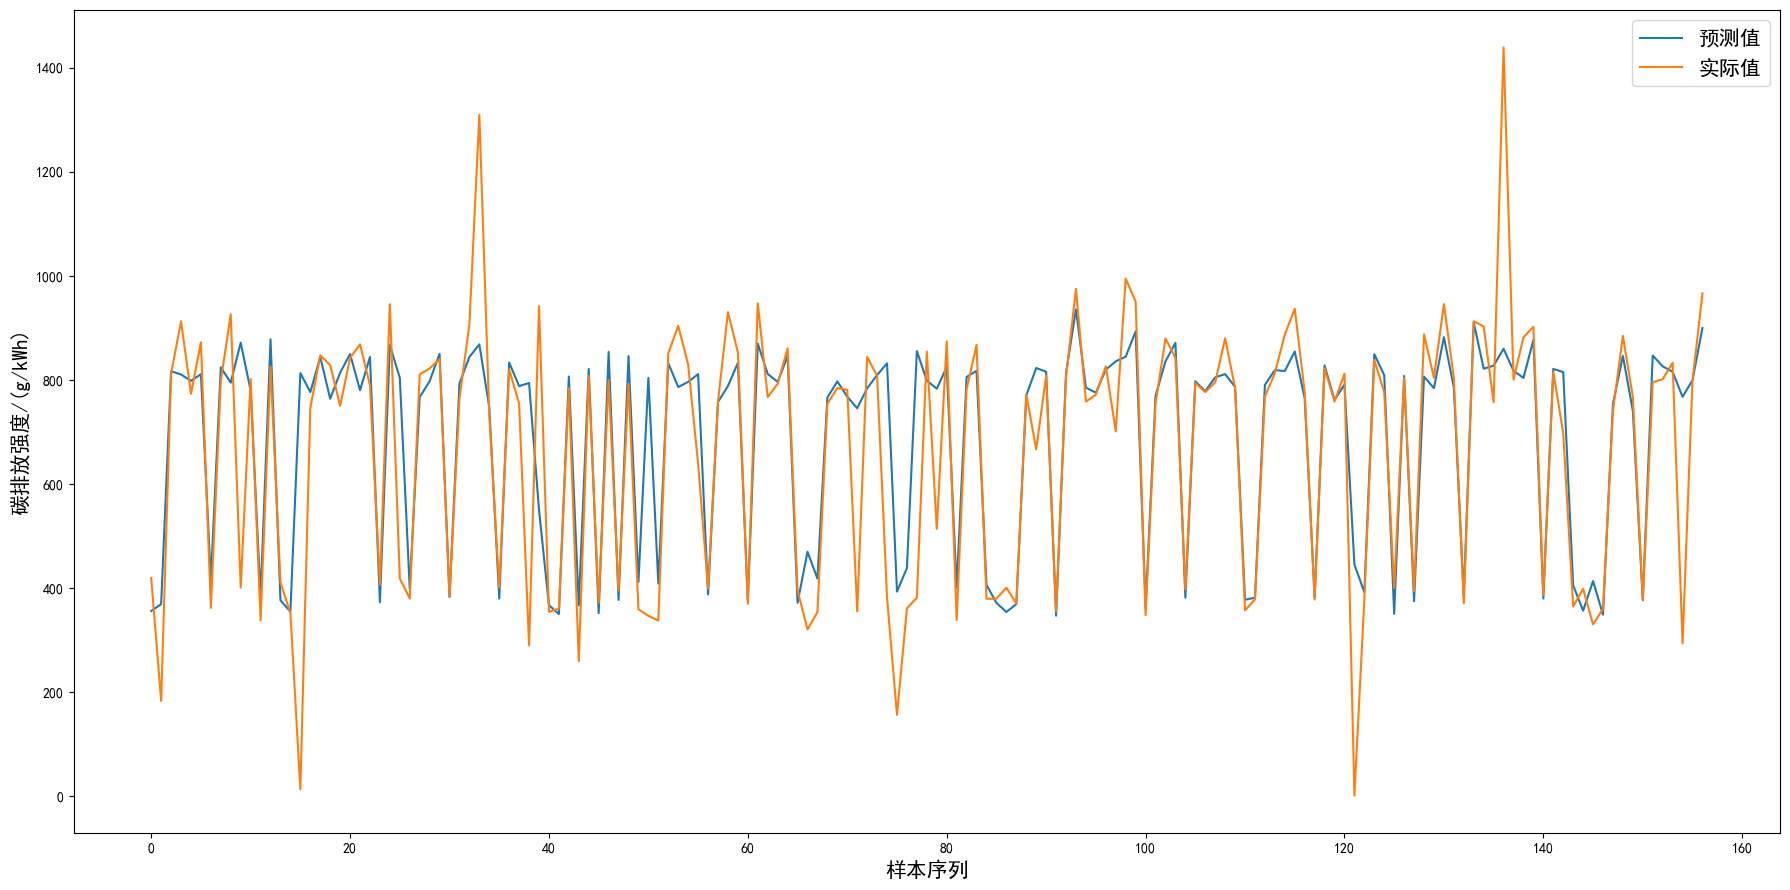

In [27]:
# 绘制test data预测值和真实值
plt.figure(figsize=(18, 9))
plt.plot(svm_y_pred, label='预测值')       # 添加预测值的标签
plt.plot(svm_y_test.values, label='实际值')  # 添加真实值的标签

# 显示图例
plt.legend(fontsize=15)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("svm.png",dpi=500,bbox_inches='tight')
plt.show()


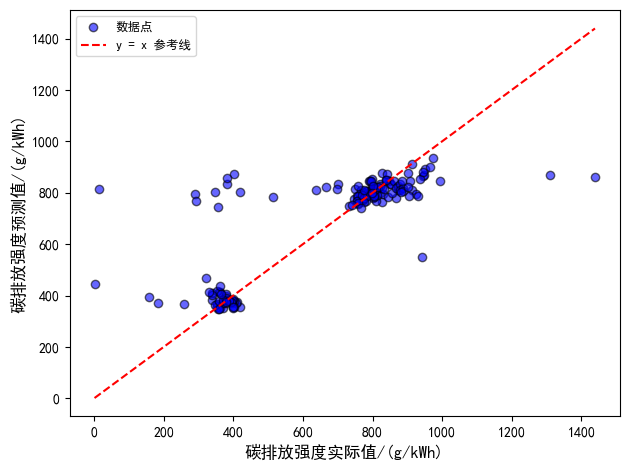

In [28]:
# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, svm_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')
#plt.scatter(y2, svm_y2_pred, color='red', alpha=0.6, edgecolor='k', label='数据点')
# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), svm_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), svm_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
# plt.savefig('预测值与实际值的吻合度3.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

机再热汽温度: 63.90974112781739
主汽温度: 40.65721963968603
热力计算排烟温度: 33.94439932640991
炉给水温度: 30.826914741158213
送风温度: 22.89036005996859
发电厂用电率: 21.792990760043555
机主汽压力: 16.793540775793762
收到基低位发热量(kJ/kg): 10.716433632572347
平均负荷率: 9.190321655986677
真空: 7.694925823540316
全水分（%）: 7.376430416813389
收到基灰分（%）: 6.627945051596646
空预器漏风率: 5.701883331114395
收到基挥发分（%）: 5.323782623702976
氧量: 5.235517226917819
空干基含碳量（%）: 4.43401733895539
运行小时: 2.89106614534192
低缸排汽温度: 0.07879294875568377


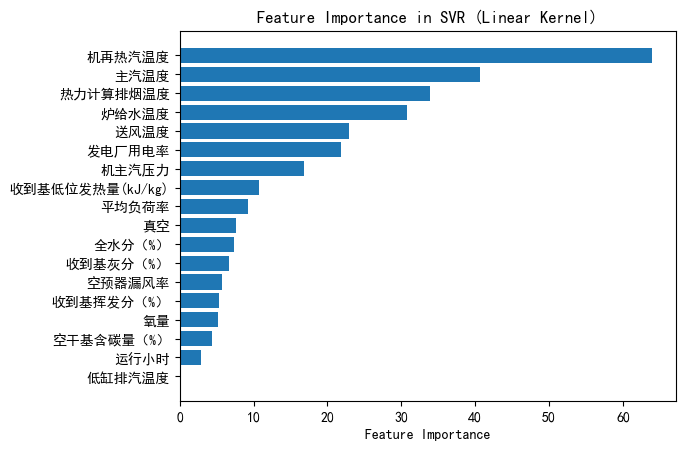

In [29]:
# Extract feature importance (for linear kernel)
feature_importance = np.abs(svr_model.coef_).flatten()

# Create a DataFrame to associate feature names with their importance
importance_df = pd.DataFrame({'Feature': svm_X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importance
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

# Plot the sorted feature importance
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in SVR (Linear Kernel)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


In [30]:
import shap
# Use the trained SVR model to create an explainer
explainer = shap.KernelExplainer(svr_model.predict, svm_X_train)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(svm_X_test)
# Visualize feature importance using SHAP
shap.summary_plot(shap_values, svm_X_test, feature_names=svm_X.columns)


Using 626 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/157 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 3.4 LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

# 设置随机种子
# seed_value = 1
# np.random.seed(seed_value)
# tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

data = df
# Convert the date column to datetime
data['日期'] = pd.to_datetime(data['日期'])

# Fill missing values with the mean of the column
# data = data.fillna(data.mean())

# Select features and target
features = data.drop(columns=['碳排放强度', '日期','机组'])
target = data['碳排放强度']

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Reshape for LSTM: (samples, time steps, features)
X = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))
y = scaled_target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1)
#500 32 225 16
# Make predictions
lstm_y_pred = model.predict(X_test)

# 评估模型
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_mape = mean_absolute_percentage_error(y_test, lstm_y_pred)
lstm_r2 = r2_score(y_test, lstm_y_pred)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='实际')
plt.plot(lstm_y_pred, label='预测')
plt.title('LSTM测试集碳排放强度预测值vs实际值')
plt.xlabel('时间')
plt.ylabel('碳排放强度',fontsize = 11)
plt.legend()
plt.show()
print(f"LSTM_MSE: {lstm_mse:.6f}")
print(f"LSTM_RMSE: {lstm_rmse:.6f}")
print(f"LSTM_MAE: {lstm_mae:.6f}")
print(f"LSTM_MAPE: {lstm_mape*100:.6f}")
print(f"LSTM_R Square: {lstm_r2:.6f}")

In [ ]:
#rescale
lstm_y_pred_rescaled = scaler.inverse_transform(lstm_y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# 计算真实尺度上的MSE、RMSE、MAE等
lstm_mse2 = mean_squared_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_rmse2 = np.sqrt(lstm_mse2)
lstm_mae2 = mean_absolute_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_mape2 = mean_absolute_percentage_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_r22 = r2_score(y_test_rescaled, lstm_y_pred_rescaled)

print(f"LSTM_MSE: {lstm_mse2:.6f}")
print(f"LSTM_RMSE: {lstm_rmse2:.6f}")
print(f"LSTM_MAE: {lstm_mae2:.6f}")
print(f"LSTM_MAPE: {lstm_mape2*100:.6f}")
print(f"LSTM_R Square: {lstm_r22:.6f}")

In [ ]:
model.predict(X_test)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(lstm_y_pred_rescaled, label='预测值')
plt.plot(y_test_rescaled, label='实际值')
# plt.title('LSTM测试集碳排放强度预测值vs实际值')
# 显示图例
plt.legend(fontsize=15)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
# plt.savefig("lstm.png",dpi=500,bbox_inches='tight')
plt.show()